# Uninterrupted character-level input with token representation using GNN

Ideas:<br>
 - Continuous unpadded/untruncated character sequences
 - Generate graph after token representation inside model
 - Using dynamic sparse GNN

Test Results:
| metric | test 1 | test 2 | test 3 | test 4 | test 5 | Average |
|:---|:--:|:--:|:--:|:--:|:--:|:--:|
| f1-score | 
| accuracy | 
| precision |
| recall | 
| loss | 

## Import Packages

In [1]:
import torch
from torch import nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
from torch.utils.data import Dataset
from transformers import BertTokenizer
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize, TweetTokenizer
import time
import matplotlib.pyplot as plt
import random
from torch_scatter import scatter_max, scatter_mean, scatter_sum, scatter_std
import torchmetrics
import lightning as L
from torch_geometric.data import Batch, Data
from torch_geometric.loader import DataLoader
from copy import copy
import spacy
from umap import UMAP

import os
import PyPDF2
from bs4 import BeautifulSoup
import textract
import json
import gzip
import re
import collections
import csv

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 1
device

device(type='cuda')

## Data Classes and Functions

In [105]:
model="lxyuan/distilbert-base-multilingual-cased-sentiments-student"
bert_tokenizer = BertTokenizer.from_pretrained(model)
# tokenizer = TweetTokenizer()

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.


In [4]:
# nlp = spacy.load('en_core_web_lg', disable=['tok2vec','tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner'])

In [5]:
# reducer = UMAP(n_neighbors=15, n_components=64, verbose=True)
# embeddings = reducer.fit_transform(all_vocab_vec)
# embeddings.shape

In [6]:
# with open(r'data\spacy_embeddings\spacy_lg_reduced_embeddings.npy', 'wb') as f:
#     np.save(f, embeddings, False)

In [7]:
folder_path = r'data\CrawledWeb\TopicClassification\HTMLClassification\htmls'
urls_df = pd.read_csv(r'data\CrawledWeb\TopicClassification\URLClassification\url_classes2.csv')
# df = pd.DataFrame(index=urls_df.index,columns=['file_name', 'content'])

In [8]:
# urls_df.iloc[3067]

In [9]:
# def read_pptx(file_path):
#     # Extract text from the pptx file
#     print(fr'file_path: {file_path}')
#     text = textract.process(rf'{file_path}').decode('utf-8')
#     return text

In [10]:
# from pathlib import Path

# for i in range(urls_df.shape[0]):
#     if os.path.isfile(rf'data\CrawledWeb\TopicClassification\HTMLClassification\htmls\link_{i}.octet_stream'):
#         p = Path(rf'data\CrawledWeb\TopicClassification\HTMLClassification\htmls\link_{i}.octet_stream')
#         p.rename(p.with_suffix(f'.html'))

In [11]:
# pptx_test = read_pptx(r'data\CrawledWeb\TopicClassification\HTMLClassification\htmls\link_91.html')

In [12]:
# pptx_test

In [13]:
# contents_dict = {}

In [14]:
# # Loop through all files in the folder
# j=11208
# for i in range(j, urls_df.shape[0]):
#     filename = os.path.join(folder_path, f'link_{i}')
#     data_type = ''
#     if True:
#         if os.path.isfile(filename+'.html'):
#             data_type = 'html'
#             file_path = filename+'.html'
#         elif os.path.isfile(filename+'.aspx'):
#             data_type = 'aspx'
#             file_path = filename+'.aspx'
#         elif os.path.isfile(filename+'.x_empty'):
#             data_type = ''
#             file_path = filename+'.x_empty'
#         elif os.path.isfile(filename+'.octet_stream'):
#             data_type = 'octet_stream'
#             file_path = filename+'.octet_stream'
#         elif os.path.isfile(filename+'.xml'):
#             data_type = 'xml'
#             file_path = filename+'.xml'
#         elif os.path.isfile(filename+'.cpp'):
#             data_type = 'cpp'
#             file_path = filename+'.cpp'
#         elif os.path.isfile(filename+'.c'):
#             data_type = 'c'
#             file_path = filename+'.c'
#         elif os.path.isfile(filename+'.cfm'):
#             data_type = 'cfm'
#             file_path = filename+'.cfm'
#         elif os.path.isfile(filename+'.cgi'):
#             data_type = 'cgi'
#             file_path = filename+'.cgi'
#         elif os.path.isfile(filename+'.ashx'):
#             data_type = 'ashx'
#             file_path = filename+'.ashx'
#         elif os.path.isfile(filename+'.asp'):
#             data_type = 'asp'
#             file_path = filename+'.asp'
#         elif os.path.isfile(filename+'.cgi'):
#             data_type = 'cgi'
#             file_path = filename+'.cgi'
#         elif os.path.isfile(filename+'.txt'):
#             data_type = 'txt'
#             file_path = filename+'.txt'
#         elif os.path.isfile(filename+'.x_appleworks3'):
#             data_type = 'x_appleworks3'
#             file_path = filename+'.x_appleworks3'
#         elif os.path.isfile(filename+'.page'):
#             data_type = 'page'
#             file_path = filename+'.page'
#         elif os.path.isfile(filename+'.php'):
#             data_type = 'php'
#             file_path = filename+'.php'
#         elif os.path.isfile(filename+'.rxml'):
#             data_type = 'rxml'
#             file_path = filename+'.rxml'
#         elif os.path.isfile(filename+'.com'):
#             data_type = 'com'
#             file_path = filename+'.com'
#         elif os.path.isfile(filename+'.cat'):
#             data_type = 'cat'
#             file_path = filename+'.cat'
#         elif os.path.isfile(filename+'.txt'):
#             data_type = 'txt'
#             file_path = filename+'.txt'
#         elif os.path.isfile(filename+'.xsp'):
#             data_type = 'xsp'
#             file_path = filename+'.xsp'
#         elif os.path.isfile(filename + '.pptx'):
#             data_type = 'pptx'
#             file_path = filename+'.pptx'
#         elif os.path.isfile(filename+'.pdf'):
#             data_type = 'pdf'
#             file_path = filename+'.pdf'
    
#     if data_type=='':
#         continue
        
#     elif data_type == 'pptx' or data_type == 'pdf' or data_type == 'html':
#         content =  read_pptx(rf'data\CrawledWeb\TopicClassification\HTMLClassification\htmls\link_{i}.'+data_type)
#         contents_dict[i] = content
#     else:
#         with open(file_path, 'rt', encoding='utf8') as file:
#             contents_dict[i] = file.read()
            
# with gzip.open(rf'data\CrawledWeb\TopicClassification\URLClassification\id_content.json.gz', 'wt') as file:
#     json.dump(contents_dict, file)

In [15]:
import string
# Create a set of all English characters, numbers, and punctuation
allowed_chars = string.ascii_letters + string.digits + string.punctuation
all_chars = set(allowed_chars)

In [16]:
with open(r'data\reduced_embeddings\spacy_lg_reduced_embeddings.npy', 'rb') as f:
    embeddings = np.load(f)
nlp = spacy.load('en_core_web_lg', disable=['tok2vec','tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner'])
nlp.max_length = len(' '.join(list(nlp.vocab.strings)))+1
all_vocab_doc = nlp(' '.join(list(nlp.vocab.strings)))
all_vocab_str = [f'{t}' for t in all_vocab_doc]
embeddings = torch.from_numpy(embeddings)
embeddings = (embeddings - torch.min(embeddings)) / (torch.max(embeddings)-torch.min(embeddings))
token_vocab_dict = dict(zip(all_vocab_str, embeddings))
del all_vocab_str
del all_vocab_doc

In [17]:
len(token_vocab_dict)

771063

In [18]:
# token_vocab_dict = {k: v for k, v in token_vocab_dict.items() if set(k).issubset(all_chars)}
# len(token_vocab_dict)

In [19]:
# with gzip.open(rf'data\CrawledWeb\TopicClassification\URLClassification\id_content.json.gz', 'rt') as file:
#     web_contents = json.load(file)

In [107]:
chars_to_replace = string.punctuation + ' \n\t'
def remove_residuals(s, tokenizer):
    for i in range(2):
        s = re.sub(r'([' + chars_to_replace + '])[' + chars_to_replace + ']*', r'\1', s)
        s = re.sub(r'([{}])\1+'.format(re.escape(string.punctuation + ' ')), r'\1', s)
        s = re.sub(f'[^{re.escape(allowed_chars)}]', ' ', s)
        s = re.sub(r'([0-9!\"#$%&\'()*+,-./:;<=>?@[\\\]^_`{|}~ \t\n\r]{9,})', '', s)
        s = re.sub( r'([a-zA-Z])\1{3,}', r'\1', s)
        s = re.sub(r'((\b\w{1,2}\b) ){4,}', '', s)
        
    tokenized_doc = tokenizer(s)
    s = ' '.join([t for t in tokenized_doc if t in token_vocab_dict])
    s = re.sub(r'([{}])\1+'.format(re.escape(string.punctuation + ' ')), r'\1', s)
    s = re.sub(f'[^{re.escape(allowed_chars)}]', ' ', s)
    s = re.sub(r'([0-9!\"#$%&\'()*+,-./:;<=>?@[\\\]^_`{|}~ \t\n\r]{9,})', '', s)
    s = re.sub( r'([a-zA-Z])\1{3,}', r'\1', s)
    s = re.sub(r'\s(.\s){3,}', ' ', s)
        
    return s

In [72]:
# with gzip.open(rf'data\CrawledWeb\TopicClassification\URLClassification\id_content.json.gz', 'rt') as file:
#     web_contents = json.load(file)

# doc_lengths = np.array([len(web_contents[i]) for i in web_contents])
# nlp.max_length = np.max(doc_lengths)+1
# web_contents = {int(k): remove_residuals(v) for k, v in web_contents.items()}
    
# # sstrip = lambda doc: re.sub(' +', ' ', doc)
# # web_contents2 = {i:sstrip(web_contents[i]) for i in web_contents}
# with gzip.open(rf'data\CrawledWeb\TopicClassification\URLClassification\id_content5.json.gz', 'wt') as file:
#     json.dump(web_contents, file)

In [73]:
# with gzip.open(rf'data\CrawledWeb\TopicClassification\URLClassification\id_content.json.gz', 'rt') as file:
#     web_contents = json.load(file)

In [74]:
# doc_lengths = np.array([len(web_contents[i]) for i in web_contents])
# list(web_contents.keys())[np.argmax(doc_lengths)]

In [24]:
with gzip.open(rf'data\CrawledWeb\TopicClassification\URLClassification\id_content5.json.gz', 'rt') as file:
    web_contents = json.load(file)
doc_lengths = np.array([len(web_contents[i]) for i in web_contents])
list(web_contents.keys())[torch.topk(torch.from_numpy(doc_lengths), 5).indices[3].item()]

'15209'

In [6]:
from polyglot.text import Text
text = "Mynameisfardin,howcanIregisterhere?"
ptext = Text(text)
print([str(word) for word in ptext.words])


Detector is not able to detect the language reliably.


['Mynameisfardin', ',', 'howcanIregisterhere', '?']


In [102]:
doc = r"""
  var opts = {
    host: "completion.amazon.com/search/complete"
  , marketId: "1"
  , obfuscatedMarketId: "ATVPDKIKX0DER"
  , searchAliases: ["aps","amazon-custom-products","amazon-devices","amazonbasics","amazonfresh","amazon-pharmacy","wholefoods","allthebestpets","bartelldrugs","bristolfarms","cardenas","familyfare","freshthyme","kegnbottle","missionwinespirits","petfoodexpress","savemart","sousaswineliquors","surdyksliquorcheeseshop","weis","stripbooks","popular","apparel","electronics","sporting","sports-and-fitness","outdoor-recreation","fan-shop","garden","videogames","toys-and-games","jewelry","digital-text","digital-music","prime-digital-music","watches","grocery","hpc","instant-video","handmade","handmade-jewelry","handmade-home-and-kitchen","prime-instant-video","shop-instant-video","baby-products","office-products","software","smart-home","magazines","tools","automotive","misc","industrial","mi","pet-supplies","digital-music-track","digital-music-album","mobile","mobile-apps","movies-tv","music-artist","music-album","music-song","stripbooks-spanish","electronics-accessories","photo","audio-video","computers","furniture","kitchen","audible","audiobooks","beauty","shoes","arts-crafts","appliances","gift-cards","pets","outdoor","lawngarden","collectibles","replacement-parts","financial","fine-art","fashion","fashion-womens","fashion-womens-clothing","fashion-womens-jewelry","fashion-womens-shoes","fashion-womens-watches","fashion-womens-handbags","fashion-mens","fashion-mens-clothing","fashion-mens-jewelry","fashion-mens-shoes","fashion-mens-watches","fashion-girls","fashion-girls-clothing","fashion-girls-jewelry","fashion-girls-shoes","fashion-girls-watches","fashion-boys","fashion-boys-clothing","fashion-boys-jewelry","fashion-boys-shoes","fashion-boys-watches","fashion-baby","fashion-baby-boys","fashion-baby-girls","fashion-luggage","3d-printing","tradein-aps","todays-deals","live-explorations","local-services","vehicles","video-shorts","warehouse-deals","luxury-beauty","banjo-apps","black-friday","cyber-monday","alexa-skills","subscribe-with-amazon","courses","edu-alt-content","amazon-global-store","prime-wardrobe","under-ten-dollars","tempo","specialty-aps-sns","luxury"]
  , filterAliases: []
  , pageType: "APBBrowse"
  , requestId: "P7KWN1XQ2KF3MFPGGV1D"
  , sessionId: "140-9752082-0182232"
  , language: "en_US"
  , customerId: ""
  , asin: ""
  , b2b: 0
  , fresh: 0
  , isJpOrCn: 0
  , isUseAuiIss: 1
};"""
print(doc)
print(len(doc))


  var opts = {
    host: "completion.amazon.com/search/complete"
  , marketId: "1"
  , obfuscatedMarketId: "ATVPDKIKX0DER"
  , searchAliases: ["aps","amazon-custom-products","amazon-devices","amazonbasics","amazonfresh","amazon-pharmacy","wholefoods","allthebestpets","bartelldrugs","bristolfarms","cardenas","familyfare","freshthyme","kegnbottle","missionwinespirits","petfoodexpress","savemart","sousaswineliquors","surdyksliquorcheeseshop","weis","stripbooks","popular","apparel","electronics","sporting","sports-and-fitness","outdoor-recreation","fan-shop","garden","videogames","toys-and-games","jewelry","digital-text","digital-music","prime-digital-music","watches","grocery","hpc","instant-video","handmade","handmade-jewelry","handmade-home-and-kitchen","prime-instant-video","shop-instant-video","baby-products","office-products","software","smart-home","magazines","tools","automotive","misc","industrial","mi","pet-supplies","digital-music-track","digital-music-album","mobile","mobile-a

In [108]:
tokenizer = TweetTokenizer()
reduced_doc = remove_residuals(doc, bert_tokenizer.tokenize)
print(reduced_doc)
print(len(reduced_doc))
# bert_tokenizer.tokenize(reduced_doc)

var op host : completion . ama . com / search / complete " market ob : ATV " search : ap " ama - custom - products " ama - devices " ama " ama " ama - ph " whole " allt " bar " br " card " family " fresh " ke " mission " pet " save " sous " sur " wei " strip " popular " " electronics " sporting " sports - and - fitness " outdoor - re " fan - shop " garden " video " toy - and - games " je " digital - text " digital - music " prime - digital - music " watch " gr " hp " instant - video " hand " hand - je " hand - home - and - kitchen " prime - instant - video " shop - instant - video " baby - products " office - products " software " smart - home " magazines " tools " auto " mis " industrial " mi " pet - supplies " digital - music - track " digital - music - album " mobile " mobile - app " movies - tv " music - artist " music - album " music - song " strip - span " electronics - " photo " audio - video " computers " furniture " kitchen " au " audio " beauty " sh " arts - craft " app " gif

In [94]:
reduced_doc = remove_residuals(doc, tokenizer.tokenize)
print(reduced_doc)
print(len(reduced_doc))
print(len(re.sub(r'\s(.\s){3,}', ' ', reduced_doc)))

( function function function string " typeof httpsia null typeof function var e = 10 , d= new Date function ( returnfor ( var function if var c ; if for ( var d=
161
161


In [ ]:
r'\(.*?\)|&.*?\s'
r'\(.*?\)|&.*?\s'

In [97]:
s = "I love ( function ( m , b ) function c ( k ) function f ( a ) a & string "
# pattern = r'((\b[\w'+re.escape(string.punctuation + ' ')+r']{1,2}\b) ){3,}'
pattern= r'\s(.\s){3,}'
re.sub(pattern, ' ', doc)

'\n  var opts host: "completion.amazon.com/search/complete"\n  , marketId: "1"\n  , obfuscatedMarketId: "ATVPDKIKX0DER"\n  , searchAliases: ["aps","amazon-custom-products","amazon-devices","amazonbasics","amazonfresh","amazon-pharmacy","wholefoods","allthebestpets","bartelldrugs","bristolfarms","cardenas","familyfare","freshthyme","kegnbottle","missionwinespirits","petfoodexpress","savemart","sousaswineliquors","surdyksliquorcheeseshop","weis","stripbooks","popular","apparel","electronics","sporting","sports-and-fitness","outdoor-recreation","fan-shop","garden","videogames","toys-and-games","jewelry","digital-text","digital-music","prime-digital-music","watches","grocery","hpc","instant-video","handmade","handmade-jewelry","handmade-home-and-kitchen","prime-instant-video","shop-instant-video","baby-products","office-products","software","smart-home","magazines","tools","automotive","misc","industrial","mi","pet-supplies","digital-music-track","digital-music-album","mobile","mobile-apps

In [3]:
import numpy as np
np.mean(np.array([0.68131868, 0.81918819, 0.78275862, 0.8,        0.54355401, 0.68421053,
 0.75457875, 0.90268456, 0.68608414, 0.62758621, 0.73529412, 0.72413793]))

0.728449645

In [4]:
(2*77.08*72.84)/(77.08+72.84)

74.90004268943436

In [ ]:
re.sub(r'\s+', ' ', reduced_doc)

In [142]:
'timeRemaining' in web_contents[f'{12}']

False

In [141]:
print(len(web_contents[f'{12}']))
print(web_contents[f'{12}'][15000:16000])

18369
alob : producer i d and schema I d must be defined for = c. = , tr , merget = , : e , f , c , lnull , rE = , S = , b = , x = , OH = , W = , Y = , C = , F = , MX = , D = , J = = = Q = U = z = A = Gle = = : e = f = = , n , t , i , = = n , Q = t , U = i , G = onull , = w : , h : , x : , y : , :o , vppe , = = ve , = = ye , = = Ee , = = Se , = = be , f = q , n = = , n = n = - n , t = , i = e.w , r = = o = n = w : , h : , x : , y : = i , ri = - , ri , n = = ne , tin in n=1 - r / i , tte.t - P , nreturn tcarouseln , = i = = , o = , a = = - u = e : e , lt : n , a : riniema = l = new t = n = r = a = inlargest - contentful - enew tfirst - e = = , c , t , e = , r = , o = : e , lob : = = a producer custom logger must be = d. = d. = n = = , e = : pagec , : : dimensions : s , merge : = , n = : page : type given for counter name or counter value : in cc.l = e , : t , : : merge : in = = c.s , = c.linstance : new a , n = , r = , s = = t. r = i = , e = , o = : r , lob : a producer custom logger mu

In [139]:
with open(r'data\CrawledWeb\TopicClassification\HTMLClassification\htmls\link_12.html', 'rt') as f:
    html_content = f.read()

In [140]:
len(html_content)

223368

In [21]:
with gzip.open(rf'data\CrawledWeb\TopicClassification\URLClassification\id_content5.json.gz', 'rt') as file:
    web_contents = json.load(file)
web_contents = {int(k): remove_residuals(v)[:30000] for k, v in web_contents.items()}
doc_lengths = np.array([len(web_contents[i]) for i in web_contents])
np.max(doc_lengths)

30000

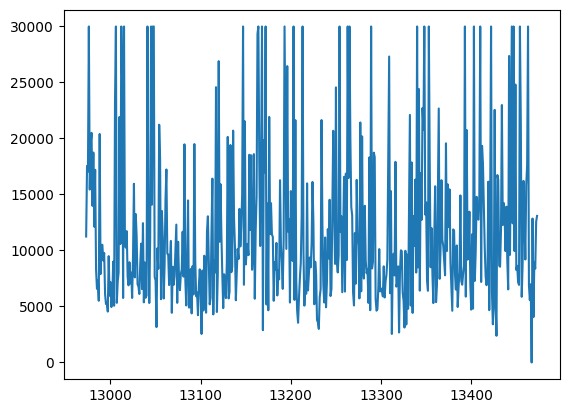

In [22]:
plt.plot(list(web_contents.keys())[12000:12500], doc_lengths[12000:12500])
plt.show()

In [23]:
# # Concatenate all string values
# all_values = "".join(web_contents.values())

# # Count the frequency of each character
# counter = collections.Counter(all_values)

# # Get the 1000 most common characters
# most_common_chars = counter.most_common(1000)

# # Save the results to a CSV file
# with open(r'data\CrawledWeb\TopicClassification\URLClassification\most_common_chars.csv', 'w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(['character', 'repeated_counts'])  # Write header
#     writer.writerows(most_common_chars)  # Write data

In [24]:
# with open(r'data\CrawledWeb\TopicClassification\URLClassification\most_common_chars.csv', 'w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(['character', 'repeated_counts'])  # Write header
#     writer.writerows(most_common_chars)  # Write data

In [25]:
# print(loaded_dict[doc_args[np.argmax(doc_lengths)]][:100])

In [26]:
# id_contents = pd.DataFrame((list(contents_dict.keys()), (list(contents_dict.values()))), columns=['ids', 'urls'])

In [27]:
# id_contents.to_csv(rf'data\CrawledWeb\TopicClassification\URLClassification\id_content.csv')

In [28]:
# active_indices = np.array(list(web_contents.keys()), dtype=np.int32)
# df = pd.read_csv(r'data\CrawledWeb\TopicClassification\URLClassification\url_classes2.csv')
# df = df.iloc[active_indices]

In [29]:
# with gzip.open(rf'data\CrawledWeb\TopicClassification\URLClassification\id_content2.json.gz', 'rt') as file:
#     web_contents = json.load(file)
#     web_contents = {int(k): re.sub(' +', ' ', v) for k, v in web_contents.items()}


In [30]:
active_indices = np.array(list(web_contents.keys()), dtype=np.int32)
df = pd.read_csv(r'data\CrawledWeb\TopicClassification\URLClassification\url_classes2.csv')
df = df.iloc[active_indices]
train_indices, val_indices = train_test_split(active_indices, test_size=0.1)

In [31]:
nlp.max_length = np.max(doc_lengths)+1
for i in web_contents:
    doc = nlp(web_contents[i])
    for t in doc:
        if t.text not in token_vocab_dict:
            token_vocab_dict[t.text] = torch.ones((64, ), dtype=torch.float32)
# token_vocab_dict['\x01'] = torch.zeros((64, ), dtype=torch.float32)

In [32]:
print(np.max(doc_lengths))
print(list(web_contents.keys())[np.argmax(doc_lengths)])

30000
11


In [33]:
# tt = TweetTokenizer()
# tweet_tokenized = tt.tokenize(web_contents[27473])
# len(tweet_tokenized)

In [34]:
# word_tokenized = word_tokenize(web_contents[27473])
# len(word_tokenized)

In [35]:
# nlp_tokenized = nlp(web_contents[27473])
# len(nlp_tokenized)

In [36]:
# tweet_tokenized[335000:336000]

In [37]:
# print(f'tweet_tokenized: {len(set(tweet_tokenized))}')
# print(f'word_tokenized: {len(set(word_tokenized))}')
# print(f'nlp_tokenized: {len(set(nlp_tokenized))}')

In [38]:
# i=0
# for t in nlp(web_contents[27473]):
#     print(f't_{i}: {t.text}')
#     i+=1

In [39]:
# embeddings2 = torch.from_numpy(embeddings2)

In [40]:
# doc = nlp(df_test['Address'].values[0])
# for t in doc:
#     print(f'{t}')
#     token_vocab_dict[t.text]
# '\x01' in list(nlp.vocab.strings)

In [41]:
# lstr = list(nlp.vocab.strings)
# for tstr in lstr:
#     if len(tstr) < 3:
#         print(tstr)

In [42]:
# ord('✭')

In [43]:
# nlp('best game ever ✭')

In [44]:
# df = pd.read_csv(r'data\CrawledWeb\TopicClassification\URLClassification\url_classes2.csv')
# df = pd.read_csv(r'C:\Users\fardin\Project\SEOIntelligence\data\url_classes.csv')
# df.dropna(inplace=True)
class_list = df.Topic.unique()
class_id = {t:i for i, t in enumerate(class_list)}
id_class = {i:t for i, t in enumerate(class_list)}
# df_train, df_test = train_test_split(df, test_size=0.1, shuffle=True)

In [45]:
# chars = set([c for i in web_contents for c in ' '.join([t.text for t in nlp(web_contents[i])])])
chars = set([c for t in token_vocab_dict for c in t])
vocab_dict = {c:i for i, c in enumerate(chars)}
if '\x01' not in vocab_dict:
    vocab_dict['\x01'] = len(vocab_dict)
np.max(list(vocab_dict.values()))
del chars

1670

In [46]:
class CharacterandTokenLevelCustomDataset(Dataset):
    
    def __init__(self, X, y, indices, num_classes, char_dict, token_dict, tokenizer) -> None:
        super().__init__()
        y = y[indices].values
        y = torch.from_numpy(np.array([class_id[c] for c in y], dtype=np.longlong))
        self.y = torch.nn.functional.one_hot(y, num_classes=num_classes).float()
        
        self.char_dict = char_dict
        self.vocab_size = len(self.char_dict)
        self.tokenizer = tokenizer
        
        self.all_data = []# torch.zeros((len(X), self.doc_char_length), dtype=torch.long)
        # self.token_lengths = torch.zeros((len(X), self.doc_teken_length), dtype=torch.int)
        # self.token_indices = torch.zeros((len(X), self.doc_char_length), dtype=torch.long)
        self.token_lengths = []
        
        self.token_embeddign_ids = []
        for i in indices:
            doc=X[i]
            tokens = self.tokenizer(doc)
            tokens = [t.text for t in tokens if t.text in token_dict]
            tokens.append('\x01')
            token_embs = [token_dict[t] if t in token_dict else torch.zeros((64, ), dtype=torch.float32) for t in tokens]
            token_embs = torch.from_numpy(np.array(token_embs, dtype=np.float32))
            doc = ' '.join(tokens)
            
            characters = torch.from_numpy(np.array([self.char_dict[t] for t in doc if t in self.char_dict], dtype=np.longlong))
            # char_pad_size = max(self.doc_char_length - len(indices), 0)
            # indices = torch.nn.functional.pad(indices[:self.doc_char_length], (0,char_pad_size))
            
            token_lengths = torch.from_numpy(np.array([len(t) for t in tokens], dtype=np.longlong))+1
            token_lengths[-1] -= 1
            token_indices = torch.repeat_interleave(torch.arange(len(token_lengths), dtype=torch.long), token_lengths)
            # token_indices = torch.nn.functional.pad(token_indices[:self.doc_char_length], (0,char_pad_size), value=len(token_lengths)-1)
            
            # self.token_embeddign_ids.append(token_embs)
            g_data = Data(x=characters,
                          character_length = len(characters),
                          num_tokens = len(token_lengths),
                          token_indices=token_indices,
                          token_lengths=token_lengths,
                          token_embeddings=token_embs)
            
                        #   character_token_lengths = torch.repeat_interleave(token_lengths, token_lengths)
            
            self.all_data.append(g_data)
            # self.token_lengths.append(token_lengths)
        
        
    def __getitem__(self, index):
        # emb_data = Data(x=self.token_embeddigns[self.token_embeddign_ids[index]])
        return self.all_data[index], self.y[index]#, Batch.from_data_list([emb_data])
        
    def __len__(self):
        return len(self.y)
        

In [47]:
from typing import List
import torch
from torch_geometric.loader import DataLoader

# from scripts.data.datasets.GraphConstructorDataset3 import WordGraphLabeledDataset


class CharacterandTokenLevelDataLoader(DataLoader):
    def __init__(
        self,
        dataset,
        batch_size: int = 1,
        shuffle: bool = False,
        follow_batch: List[str] | None = None,
        exclude_keys: List[str] | None = None,
        **kwargs,
    ):
        super(CharacterandTokenLevelDataLoader, self).__init__(
            dataset, batch_size, shuffle, follow_batch, exclude_keys, **kwargs
        )

    def __iter__(self):
        base_iterator = super(CharacterandTokenLevelDataLoader, self).__iter__()
        for batch in base_iterator:
            cumsum_vals = torch.cumsum(batch[0].num_tokens, dim=0).roll(1)
            cumsum_vals[0] = 0
            additions = torch.repeat_interleave(cumsum_vals, batch[0].character_length)
            batch[0].cumulative_token_indices = batch[0].token_indices + additions
            yield batch


## Prepare Data

In [48]:
batch_size = 8

In [49]:
train_dataset = CharacterandTokenLevelCustomDataset(web_contents, df.Topic, train_indices, len(class_id), vocab_dict, token_vocab_dict, nlp)
test_dataset = CharacterandTokenLevelCustomDataset(web_contents, df.Topic, val_indices, len(class_id), vocab_dict, token_vocab_dict, nlp)
train_dataloader = CharacterandTokenLevelDataLoader(train_dataset, batch_size=batch_size, drop_last=True, shuffle=False)
test_dataloader = CharacterandTokenLevelDataLoader(test_dataset, batch_size=batch_size, drop_last=True, shuffle=False)

In [82]:
num_embedding = len(vocab_dict)
del web_contents
del train_indices
del vocab_dict
del token_vocab_dict
del nlp
del val_indices
del df
del active_indices
del doc_lengths
del embeddings

In [97]:
batch_size = 12
train_dataloader = CharacterandTokenLevelDataLoader(train_dataset, batch_size=batch_size, drop_last=True, shuffle=False)
test_dataloader = CharacterandTokenLevelDataLoader(test_dataset, batch_size=batch_size, drop_last=True, shuffle=False)

In [51]:
# X,y = next(iter(test_dataset))
# print(f'X.character_length: {X.character_length}')
# print(f'X.num_tokens: {X.num_tokens}')
# print(f'X.token_indices: {X.token_indices}')
# print(f'len(X.token_indices): {len(X.token_indices)}')
# print(f'sum(X.token_lengths): {sum(X.token_lengths)}')
# print(f'X.token_embeddings.shape: {X.token_embeddings.shape}')

In [98]:
X, y = next(iter(test_dataloader))

In [53]:
x_shapes = []
for X, y in test_dataloader:
    x_shapes.append(X.x.shape[0])

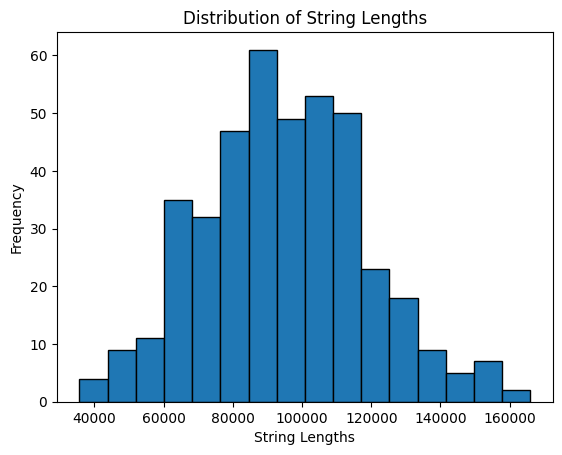

In [54]:
# Create a histogram
plt.hist(x_shapes, bins='auto', edgecolor='black')

# Add labels and title
plt.xlabel('String Lengths')
plt.ylabel('Frequency')
plt.title('Distribution of String Lengths')

# Show the chart
plt.show()

In [55]:
X

DataBatch(x=[91223], character_length=[8], num_tokens=[8], token_indices=[91223], token_lengths=[14636], token_embeddings=[14636, 64], batch=[91223], ptr=[9], cumulative_token_indices=[91223])

## Model Classes and Functions

In [56]:
# token_reps = scatter_mean(X.x, X.cumulative_token_indices)

In [57]:
class AdaptiveScatterPooling(nn.Module):

    def __init__(self, num_features=128, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.epsilon = nn.Parameter(torch.randn((num_features,1, 1)))
        
    def forward(self, x, index):
        sc_max = scatter_max(x, index, dim=1)[0]
        sc_mean = scatter_mean(x, index, dim=1)
        return sc_mean +  + (sc_max-sc_mean) * self.epsilon


In [58]:
base_range = torch.arange(1000000, device=device)
for i in range(50000):
    rr = base_range[:50000]
    # rr = torch.arange(50000, device=device)

In [59]:
from torch_geometric.nn import GATv2Conv, SimpleConv


class GCNN(nn.Module):
    def __init__(self, hidden_dim, *args, **kwargs):
        super(GCNN, self).__init__(*args, **kwargs)
        # self.hidden_dim = hidden_dim
        self.gnn = GATv2Conv(hidden_dim, hidden_dim//8, heads=4)
        # self.gnn = SimpleConv(aggr='mean')
        self.conv = nn.Conv1d(hidden_dim, hidden_dim//2, kernel_size=3, padding=1)
        self.fc = nn.Linear(hidden_dim//2, hidden_dim)
        # self.out_fc = nn.Linear(2*hidden_dim, hidden_dim)
        self.bn1 = nn.BatchNorm1d(hidden_dim//2)
        # self.bn2 = nn.BatchNorm1d(hidden_dim)
        self.bn3 = nn.BatchNorm1d(hidden_dim)
        # self.bn4 = nn.BatchNorm1d(hidden_dim)
        
    def forward(self, x, graph, total_token_count, return_attention_weights = False):
        x1, edge_weights = self.gnn(x, graph.edge_index, return_attention_weights=return_attention_weights) 
        x2 = F.relu(self.conv(x[:total_token_count].T).T)#self.bn2(self.conv(x[:total_token_count].T).T))
        x3 =  F.leaky_relu_(self.bn3(self.fc(x1[total_token_count:])))
        x1 = F.leaky_relu_(self.bn1(x1[:total_token_count]))
        x = torch.cat([x1, x2], dim=1)
        x = torch.cat([x, x3], dim=0)
        # x = self.bn4(x)
        return x, edge_weights #F.leaky_relu_(self.bn4(self.out_fc(x)))

In [60]:
import networkx as nx
from torch_geometric.utils import to_networkx, to_undirected

class GenGraph(nn.Module):
    
    def __init__(self, hidden_dim, virtual_nodes, lattice_step, *args, **kwargs):
        super(GenGraph, self).__init__(*args, **kwargs)
        self.hidden_dim = hidden_dim
        self.virtual_nodes = virtual_nodes
        self.lattice_step = lattice_step
        self.virtual_node_embeddings = nn.Embedding(self.virtual_nodes, hidden_dim)
        
    def gen_graph(self, x, total_token_coutns, token_counts, random_edges, lattice_edges, lattice_start_distance=2):
        random_links, lattice_links, tc_range = self.calculate_graph(x, total_token_coutns, token_counts, random_edges, lattice_edges, lattice_start_distance)
        v_n_e_counts = total_token_coutns*self.virtual_nodes
        base_numel = random_links.numel() + lattice_links.numel()*2
        edge_index = torch.empty((2, base_numel + v_n_e_counts*2), dtype=torch.int64, device=x.device)
        self.fill_lattice_and_random_edges(edge_index, random_links, lattice_links, tc_range)
        # for i in range(0, lattice_links.shape[1]*2, step=2):
        #     edge_index[:, i*lattice_links.shape[0]:(i+1)*lattice_links.shape[0]] = torch.cat([lattice_links[:,i].view(1,-1), tc_range], dim=0)
        #     edge_index[:, (i+1)*lattice_links.shape[0]:(i+2)*lattice_links.shape[0]] = edge_index[:, i*lattice_links.shape[0]:(i+1)*lattice_links.shape[0]][[1, 0]]
        # for i in range(lattice_links.shape[1]*2, lattice_links.shape[1]*2+random_links.shape[1]):
        #     edge_index[:, i*random_links.shape[0]:(i+1)*random_links.shape[0]] = torch.cat([random_links[:,i].view(1,-1), tc_range], dim=0)
            
        if self.virtual_nodes > 0:
            virtual_nodes_range = torch.arange(self.virtual_nodes, device=x.device).view(1, -1)
            virtual_nodes_ids = torch.repeat_interleave(virtual_nodes_range, len(token_counts), dim=0)
            v_n_idx = (virtual_nodes_ids + torch.arange(0, len(token_counts)*self.virtual_nodes, self.virtual_nodes, device=x.device).view(-1, 1) + total_token_coutns )
            virtual_edge_ids = torch.repeat_interleave(v_n_idx.view(-1), token_counts.view(-1, 1).expand(len(token_counts), self.virtual_nodes).reshape(-1), dim=0).view(1, -1)
            
            embs = self.virtual_node_embeddings(virtual_nodes_ids.T).view(-1, self.hidden_dim)
            x_extended = torch.cat([x, embs], dim=0)
            x_index = torch.arange(total_token_coutns, device=x.device).repeat(self.virtual_nodes).view(1, -1)
            edge_index[:, base_numel:base_numel+v_n_e_counts] = torch.cat([x_index, virtual_edge_ids], dim=0)
            edge_index[:, base_numel+v_n_e_counts:] = torch.cat([virtual_edge_ids, x_index], dim=0)
            x = x_extended
        
        return Batch.from_data_list([Data(x=x, edge_index=edge_index)])
        
    def re_gen_graph(self, x, edge_index, total_token_coutns, token_counts, random_edges, lattice_edges, lattice_start_distance=2):
        random_links, lattice_links, tc_range = self.calculate_graph(x, total_token_coutns, token_counts, random_edges, lattice_edges, lattice_start_distance)
        base_numel = random_links.numel() + lattice_links.numel()*2
        
        self.fill_lattice_and_random_edges(edge_index, random_links, lattice_links, tc_range)
        # for i in range(base.shape[1]):
        #     edge_index[:, i*base.shape[0]:(i+1)*base.shape[0]] = torch.cat([tc_range, base[:,i].view(1,-1)], dim=0)
            
        return Batch.from_data_list([Data(x=x, edge_index=edge_index)])
    
    def replace_unimportant_edges(self, edge_weights, x, edge_index, total_token_coutns, token_counts, random_edges, lattice_edges, p_keep=1, lattice_start_distance=2):
        v_n_e_counts = total_token_coutns*self.virtual_nodes
        if v_n_e_counts>0:
            important_indices = torch.topk(edge_weights[:-2*v_n_e_counts].view(-1, total_token_coutns), p_keep, dim=0).indices
        else:
            important_indices = torch.topk(edge_weights.view(-1, total_token_coutns), p_keep, dim=0).indices
        # important_indices = torch.topk(edge_weights[:-1*total_token_coutns].view(-1, total_token_coutns), 1, dim=0).indices.squeeze()

        important_indices = torch.arange(total_token_coutns, dtype=torch.int64, device=x.device) + important_indices*total_token_coutns
        important_indices = important_indices.view(-1)
        random_links, lattice_links, tc_range = self.calculate_graph(x, total_token_coutns, token_counts, random_edges, lattice_edges, lattice_start_distance)
        base_numel = random_links.numel() + lattice_links.numel()*2
        
        new_edge_index = torch.empty((2, base_numel + important_indices.shape[0] + 2*v_n_e_counts), dtype=torch.int64, device=x.device)
        self.fill_lattice_and_random_edges(new_edge_index, random_links, lattice_links, tc_range)
        new_edge_index[:, base_numel:base_numel+important_indices.shape[0]] = edge_index[:, important_indices]
        if(self.virtual_nodes>0):
            new_edge_index[:, -2*v_n_e_counts:] = edge_index[:, -2*v_n_e_counts:]
            
        # for i in range(base.shape[1]):
        #     new_edge_index[:, i*base.shape[0]:(i+1)*base.shape[0]] = torch.cat([tc_range, base[:,i].view(1,-1)], dim=0)
        
        return Batch.from_data_list([Data(x=x, edge_index=new_edge_index)])
         
    def calculate_graph(self, x, total_token_coutns, token_counts, random_edges, lattice_edges, lattice_start_distance):
        tc_extended = torch.repeat_interleave(token_counts, token_counts, dim=0).view(-1,1)
        tc_lower_bound = torch.empty((len(token_counts)+1), dtype=torch.long, device=x.device) #torch.cuda.IntTensor(len(token_counts)+1) #
        tc_lower_bound[0] = 0
        tc_lower_bound[1:] = torch.cumsum(token_counts, dim=0)
        tc_lower_bound_extended = torch.repeat_interleave(tc_lower_bound[:-1], token_counts, dim=0).view(-1,1)
        tc_range = torch.arange(tc_lower_bound[-1], device=x.device).view(-1,1)
        # torch.arange(tc_lower_bound[-1], dtype=torch.int32, device=x.device).view(-1,1)
        random_ints = torch.randint(0, 2*total_token_coutns, (total_token_coutns, random_edges), device=x.device) # torch.cuda.IntTensor(len(token_lengths), random_edges).random_()
        lattice = torch.arange(lattice_start_distance, self.lattice_step*lattice_edges+1, self.lattice_step, device=x.device).view(1, -1)

        # exponentials = torch.pow(2, torch.arange(1, self.exp_edges+1, device=x.device)).view(1, -1)
        tc_local_range = tc_range - tc_lower_bound_extended
        random_links = (((random_ints % (tc_extended - 1))+1 + tc_local_range) % tc_extended)+tc_lower_bound_extended
        lattice_links = ((lattice + tc_local_range) % tc_extended)+tc_lower_bound_extended
        # base = torch.cat([base1, base2], dim=1)
        tc_range = tc_range.view(1,-1)
        return random_links, lattice_links, tc_range
    
    def fill_lattice_and_random_edges(self, edge_index, random_links, lattice_links, tc_range):
        for i in range(0, lattice_links.shape[1]*2, 2):
            edge_index[:, i*lattice_links.shape[0]:(i+1)*lattice_links.shape[0]] = torch.cat([lattice_links[:,i//2].view(1,-1), tc_range], dim=0)
            edge_index[:, (i+1)*lattice_links.shape[0]:(i+2)*lattice_links.shape[0]] = edge_index[:, i*lattice_links.shape[0]:(i+1)*lattice_links.shape[0]][[1, 0]]
            
        for i in range(random_links.shape[1]):
            j = i + lattice_links.shape[1]*2
            edge_index[:, j*random_links.shape[0]:(j+1)*random_links.shape[0]] = torch.cat([random_links[:,i].view(1,-1), tc_range], dim=0)

In [61]:
# torch.max(X.x)

In [62]:
# embedding = nn.Embedding(len(vocab_dict), 64)
# x = embedding(X.x)
# x = scatter_mean(x.T, X.cumulative_token_indices, dim=1)

# graph_generator = GenGraph(64, 1, 2)
# graph = graph_generator.gen_graph(x.T, len(X.token_lengths), X.num_tokens, 2, 2)
# gcnn1 = GCNN(64)
# x, edge_weights = gcnn1(graph.x, graph, len(X.token_lengths), return_attention_weights = True)
# edge_weights = edge_weights[1][:graph.edge_index.shape[1], 0]
# # edge_weights = torch.sum(edge_weights[1][:graph.edge_index.shape[1], :],dim=1)
# graph = graph_generator.replace_unimportant_edges(edge_weights, x, graph.edge_index, len(X.token_lengths), X.num_tokens, 4, 4, p_keep=2, lattice_start_distance=3)
# graph

In [63]:
# weights.T[0].view(-1, len(X.token_lengths))

In [64]:
# r_v = torch.randn(5, 6)
# torch.topk(r_v, 2, dim=0)
# r_v
# len(graph.x)
# edge_weights.view(-1, len(X.token_lengths))
# important_indices = torch.topk(weights.T[0][:-1*len(X.token_lengths)].view(-1, len(X.token_lengths)), 1, dim=0).indices.squeeze()
# print(important_indices)
# print(torch.arange(important_indices.shape[0]) + important_indices*important_indices.shape[0])

In [65]:
from torch_geometric.nn import GATv2Conv, SimpleConv, summary

class CNN_for_Text(nn.Module):
    
    def __init__(self, num_embedding, batch_size, max_char_count, embedding_dim=64, hidden_dim=64, dropout=0.3, num_out_features=4, seed=-1, random_edges=4, lattice_edges=10, virtual_nodes=1, lattice_step=2, lattice_start_distance=2, *args, **kwargs) -> None:
        super(CNN_for_Text, self).__init__(*args, **kwargs)
        self.batch_size = batch_size
        self.max_char_count = max_char_count
        self.hidden_dim = hidden_dim
        self.virtual_nodes = virtual_nodes
        self.base_random_edges = random_edges
        self.base_lattice_edges = lattice_edges
        self.lattice_start_distance = lattice_start_distance
        if seed>-1:
            torch.manual_seed(seed)
        
        self.embedding = nn.Embedding(num_embedding, embedding_dim)

        self.conv1 = nn.Conv1d(embedding_dim, hidden_dim, kernel_size=5, padding=2)
        self.pool1 = nn.MaxPool1d(2)
        self.conv2 = nn.Conv1d(hidden_dim, hidden_dim, kernel_size=5, padding=2)
        self.conv3 = nn.Conv1d(2*hidden_dim, hidden_dim, kernel_size=3, padding=1)
        self.conv4 = nn.Conv1d(hidden_dim, hidden_dim, kernel_size=3, padding=1)

        # self.conv5 = nn.Conv1d(2*hidden_dim, hidden_dim, kernel_size=3, padding=1)
        
        self.gcnn1 = GCNN(hidden_dim)
        self.gcnn2 = GCNN(2*hidden_dim)
        self.graph_generator = GenGraph(hidden_dim, virtual_nodes, lattice_step)
        
        k = 32
        self.fc0 =  nn.Linear(hidden_dim , 2*hidden_dim)
        self.fc1 = nn.Linear(2*hidden_dim , hidden_dim * k)
        self.fc2 = nn.Linear(hidden_dim * (2+virtual_nodes) * k , 32)
        # self.fc3 = nn.Linear(hidden_dim * k, 32)
        self.dropout = nn.Dropout(dropout)
        self.fc_out = nn.Linear(32, num_out_features)
    
    def forward(self, g_data):
        # rand_edges = self.get_random_edge_count(g_data.x.shape[0])
        x = self.embedding(g_data.x)
        x = self.dropout(x)
        x = x.T
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.dropout(x)
        x1 = scatter_max(x, g_data.cumulative_token_indices, dim=1)[0]
        x2 = scatter_mean(x, g_data.cumulative_token_indices, dim=1)

        x = torch.cat([x1, x2], dim=0)

        x = F.relu(self.conv3(x)) 
        
        # x = self.dropout(x)
        rand_edges, lattice_edges = self.base_random_edges, self.base_lattice_edges
        graph = self.graph_generator.gen_graph(x.T, len(g_data.token_lengths), g_data.num_tokens, rand_edges, lattice_edges, lattice_start_distance=self.lattice_start_distance)
        rand_edges = rand_edges-1 # max(1, rand_edges-1)
        lattice_edges = lattice_edges-1 # max(1, lattice_edges-1)
        # self.gen_graph(x.T, len(g_data.token_lengths), g_data.num_tokens)
        # x = torch.cat([graph.x, g_data.token_embeddings], dim=1)
        
        x, edge_weights = self.gcnn1(graph.x, graph, len(g_data.token_lengths), return_attention_weights = True)
        # edge_weights = torch.sum(edge_weights[1][:graph.edge_index.shape[1], :],dim=1)
        edge_weights = edge_weights[1][:graph.edge_index.shape[1], 0]
        
        graph = self.graph_generator.replace_unimportant_edges(edge_weights, x, graph.edge_index, len(g_data.token_lengths), g_data.num_tokens, rand_edges, lattice_edges, p_keep=2, lattice_start_distance=self.lattice_start_distance+1)
        
        x = torch.cat([graph.x[:g_data.token_embeddings.shape[0]], g_data.token_embeddings], dim=1)
        x1 = F.relu(self.fc0(graph.x[g_data.token_embeddings.shape[0]:]))
        x = torch.cat([x, x1], dim=0)
        
        # x = x + graph.x  /////
        # graph = self.graph_generator.re_gen_graph(x, graph.edge_index, len(g_data.token_lengths), g_data.num_tokens)    //////
        #self.re_gen_graph(x, graph.edge_index, len(g_data.token_lengths), g_data.num_tokens)
        x, edge_weights = self.gcnn2(x, graph, len(g_data.token_lengths))
        # x = x + x1  /////
        x = F.elu_(self.fc1(x))
        doc_token_index = torch.repeat_interleave(torch.arange(len(g_data.num_tokens), device=x.device), g_data.num_tokens)
        x1 = scatter_max(x[:len(g_data.token_lengths)], doc_token_index, dim=0)[0]
        x2 = scatter_mean(x[:len(g_data.token_lengths)], doc_token_index, dim=0)
        vn_embs = x[len(g_data.token_lengths):]
        x_for_cat = [x1, x2]
        x_for_cat.extend([vn_embs[i*x1.shape[0]:(i+1)*x1.shape[0]] for i in range(self.virtual_nodes)])
        x = torch.cat(x_for_cat, dim=1)
        
        x = F.elu_(self.fc2(x))
        x = self.dropout(x)
        x = self.fc_out(x)
        return x

    # def get_random_edge_count(self, input_char_count):
    #     if input_char_count>390000:
    #         print(f'input_char_count: {input_char_count}')
    #         return 1
    #     if input_char_count>300000:
    #         return 2
    #     if input_char_count>250000:
    #         return 3
    #     return 4

In [ ]:
del nlp
del val_indices
del df
del active_indices
del doc_lengths
del embeddings

In [103]:
model = CNN_for_Text(num_embedding=num_embedding, batch_size=batch_size, max_char_count=256, embedding_dim=128, hidden_dim=64, num_out_features=len(class_id), random_edges=4, lattice_edges=4, virtual_nodes=0) #.to(device)
print(summary(model, X.cpu()))
del model

+-------------------------------------------+------------------------------+----------------+----------+
| Layer                                     | Input Shape                  | Output Shape   | #Param   |
|-------------------------------------------+------------------------------+----------------+----------|
| CNN_for_Text                              | [157807, 157807]             | [12, 12]       | 779,148  |
| ├─(embedding)Embedding                    | [157807]                     | [157807, 128]  | 213,888  |
| ├─(conv1)Conv1d                           | [128, 157807]                | [64, 157807]   | 41,024   |
| ├─(pool1)MaxPool1d                        | --                           | --             | --       |
| ├─(conv2)Conv1d                           | [64, 157807]                 | [64, 157807]   | 20,544   |
| ├─(conv3)Conv1d                           | [128, 26080]                 | [64, 26080]    | 24,640   |
| ├─(conv4)Conv1d                           | --       

In [67]:
# model = model.eval()
# with torch.no_grad():
#     model(X.cpu()).shape #.to(device)
torch.cuda.empty_cache()

In [104]:

class CnnGnnClassifierLightningModel(L.LightningModule):
    def __init__(
        self,
        model,
        num_classes,
        optimizer=None,
        loss_func=None,
        learning_rate=0.01,
        batch_size=64,
        lr_scheduler=None,
        user_lr_scheduler=False,
        min_lr=0.0,
    ):
        super(CnnGnnClassifierLightningModel, self).__init__()
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.model = model
        self.min_lr = min_lr
        # self.save_hyperparameters(ignore=["model"])
        self.save_hyperparameters("model", logger=False)
        self.optimizer = self._get_optimizer(optimizer)
        self.lr_scheduler = (
            self._get_lr_scheduler(lr_scheduler) if user_lr_scheduler else None
        )
        self.loss_func = loss_func
        self.train_losses = []
        self.val_losses = []
        self.train_acc = torchmetrics.Accuracy(task="multiclass", num_classes=num_classes)
        self.val_acc = torchmetrics.Accuracy(task="multiclass", num_classes=num_classes)
        self.test_acc = torchmetrics.Accuracy(task="multiclass", num_classes=num_classes)

    def forward(self, x, *args, **kwargs):
        return self.model(x)

    def on_train_epoch_start(self) -> None:
        param_groups = next(iter(self.optimizer.param_groups))
        if "lr" in param_groups and param_groups["lr"] is not None:
            current_learning_rate = float(param_groups["lr"])
            self.log(
                "lr",
                current_learning_rate,
                batch_size=self.batch_size,
                on_epoch=True,
                on_step=False,
            )

    def training_step(self, batch, *args, **kwargs):
        X, y = batch
        X.to(self.device)
        y.to(self.device)
        
        self.model.train()
        y_out = self(X)

        loss = self.loss_func(y_out.view(y.shape), y )
        self.train_losses.append(loss.detach().item())
        self.log(
            "train_loss",
            loss,
            prog_bar=True,
            batch_size=self.batch_size,
            on_epoch=True,
            on_step=True,
        )
        
        self.train_acc(torch.argmax(y_out, dim=1), torch.argmax(y, dim=1))
        self.log('train_acc', self.train_acc, prog_bar=True, on_epoch=True, on_step=True, batch_size=self.batch_size)
        
        return loss

    def validation_step(self, batch, *args, **kwargs):
        X, y = batch
        X.to(self.device)
        y.to(self.device)
        
        self.model.eval()
        y_out = self(X)
        loss = self.loss_func(y_out.view(y.shape), y )
        self.val_losses.append(loss.detach().item())

        self.log(
            "val_loss",
            loss,
            prog_bar=True,
            batch_size=self.batch_size,
            on_epoch=True,
            on_step=True,
        )
        
        
        self.val_acc(torch.argmax(y_out, dim=1), torch.argmax(y, dim=1))
        self.log('val_acc', self.val_acc, prog_bar=True, on_epoch=True, on_step=True, batch_size=self.batch_size)

    def configure_optimizers(self):
        if self.lr_scheduler is None:
            return self.optimizer

        return {
            "optimizer": self.optimizer,
            "lr_scheduler": {
                "scheduler": self.lr_scheduler,
                "monitor": "train_loss",
                "interval": "epoch",
                "frequency": 1,
            },
        }

    def update_learning_rate(self, learning_rate: float):
        self.learning_rate = learning_rate
        for g in self.optimizer.param_groups:
            g["lr"] = learning_rate

    def _get_optimizer(self, optimizer):
        return (
            optimizer
            if optimizer is not None
            else torch.optim.Adam(self.model.parameters(), lr=self.learning_rate)
        )

    def _get_lr_scheduler(self, lr_scheduler):
        return (
            lr_scheduler
            if lr_scheduler is not None
            else torch.optim.lr_scheduler.ReduceLROnPlateau(
                self.optimizer, patience=5, factor=0.5, mode="min", min_lr=self.min_lr
            )
        )


In [105]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from torchmetrics import ConfusionMatrix


def calculate_metrics(cl_model, dataloader):
    cm = ConfusionMatrix(task="multiclass", num_classes=len(class_id))

    y_pred = []
    y_true = []

    cl_model = cl_model.eval()
    cl_model.to(device)
    for X, y in tqdm(dataloader):
        X = X.to(device)
        with torch.no_grad():
            y_p = cl_model(X)
            y_p = y_p.cpu()
        y_pred.append(y_p)
        y_true.append(y)
    y_pred = torch.cat(y_pred, dim=0)
    y_true = torch.cat(y_true, dim=0)
    y_pred2 = torch.argmax(y_pred, dim=1)
    y_true2 = torch.argmax(y_true, dim=1)
    print(f'classification report: \n {classification_report(y_true2, y_pred2, digits=4)}')
    print(f'confusion matrix:\n {cm(y_pred2, y_true2)}')
    print('================================')


## Test Model

In [106]:
output_size = 128
hidden_dim = 64
embedding_dim = 64
label_size = 1
seed = 911

In [107]:
import os
print(os.getcwd())

c:\Users\fardin\Projects\Form&ColorIntelligence


In [108]:
# from scripts.managers.ClassifierModelManager import ClassifierModelManager
from lightning.pytorch.loggers import CSVLogger
import lightning as L
# from scripts.managers.ClassifierModelManager import ClassifierModelManager

In [109]:
# classifier_torch_model = CNN_for_Text(num_embedding=len(vocab_dict), batch_size=batch_size, hidden_dim=hidden_dim, embedding_dim=embedding_dim, max_char_count=256, dropout=0.2, num_out_features=len(class_id), seed=seed, random_edges=4, lattice_edges=3, lattice_step=2, virtual_nodes=0).to(device)
# optimizer = torch.optim.Adam(classifier_torch_model.parameters(), lr=0.0032, weight_decay=0.000012)
# # lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[50, 100, 150, 200, 250, 300, 350],gamma=0.5, verbose=False)
# lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[20, 30, 40, 50, 60, 70, 80],gamma=0.5, verbose=False)
# loss_func = torch.nn.BCEWithLogitsLoss()
# classfier_lightning_model = CnnGnnClassifierLightningModel(classifier_torch_model, 
#                                                     num_classes=len(class_id),
#                                             learning_rate=0.0032,
#                                             batch_size=batch_size,
#                                             optimizer=optimizer,
#                                             loss_func=loss_func,
#                                             lr_scheduler=lr_scheduler,
#                                             user_lr_scheduler=True
#                                             ).to(device)


# model_manager = ClassifierModelManager(classifier_torch_model, classfier_lightning_model, log_name='CNN-GNN2',device=device, num_train_epoch=400)
# # trainer = L.Trainer(
# #             # callbacks=callbacks,
# #             max_epochs=epochs,
# #             accelerator= 'gpu' if torch.cuda.is_available() else 'cpu',
# #             logger=CSVLogger(save_dir='logs/', name='log2'), 
# #             num_sanity_val_steps=0,
# #         #     default_root_dir='models\model2_word_embedding-256-2'
# #         )

# # model_manager.fit(train_dataloaders=train_dataloader, val_dataloaders=test_dataloader)
# # model_manager.save_plot_csv_logger(loss_names=['train_loss_epoch', 'val_loss_epoch'], eval_names=['train_acc_epoch', 'val_acc_epoch'], name_prepend=f'tests_{dropout}_{weight_decay}_{lr}')
# # model_manager.torch_model = model_manager.torch_model.to(device)
# # model_manager.save_evaluation(test_dataloader, f'{dropout}_{weight_decay}_{lr}',True, True, True, True, True, True, True, multi_class=True)
# # # trainer.fit(classfier_lightning_model, train_dataloaders=train_dataloader, val_dataloaders=test_dataloader)
# # classfier_lightning_model.model = classfier_lightning_model.model.eval()
# # classfier_lightning_model = classfier_lightning_model.eval()
# # calculate_metrics(classfier_lightning_model, test_dataloader)
# # return model_manager\
# model_manager.draw_summary(test_dataloader)
# # print(summary(model_manager, X.to(device)))

In [110]:
# from lightning.pytorch.tuner import Tuner
# tuner = Tuner(model_manager.trainer)
# tuning_result = tuner.lr_find(classfier_lightning_model, train_dataloaders=train_dataloader, val_dataloaders=test_dataloader, min_lr=0.00001,max_lr=0.01, num_training=100)

# fig = tuning_result.plot(suggest=True)
# fig.show()

In [111]:
# Fardin Rastakhiz @ 2023
from abc import ABC, abstractmethod
from typing import List, Optional

import torch
import lightning as L
from lightning.pytorch.callbacks import Callback, ModelCheckpoint, EarlyStopping
from lightning.pytorch.loggers import Logger, CSVLogger
from lightning.pytorch.tuner import Tuner
from typing import List
from pytorch_lightning.core.saving import save_hparams_to_yaml

class ModelManager(ABC):

    def __init__(self,
                 torch_model: torch.nn.Module,
                 lightning_model,
                 model_save_dir: str = '~/Desktop',
                 log_dir: str = 'logs/',
                 log_name: str = 'model_logs',
                 device='cpu',
                 max_epochs = 100,
                 ckpt_path: str|None=None,
                 accumulate_grad_batches=1):
        self.torch_model = torch_model
        self.lightning_model = lightning_model
        self.log_dir = log_dir
        self.log_name = log_name
        self.model_save_dir = model_save_dir
        self.device = device
        self.accelerator = 'cpu' if self.device=='cpu' else 'gpu'
        self.max_epochs = max_epochs
        self.ckpt_path = ckpt_path

        self.logger = self._create_logger()
        self.callbacks = self._create_callbacks()
        self.trainer: L.Trainer = self._create_trainer(accumulate_grad_batches)
        self.tuner = Tuner(self.trainer)
        self.tuning_result = None

    def tune(self, data_manager, draw_result=True, min_lr=0.0000001, max_lr=0.1):
        self.tuning_result = self.tuner.lr_find(self.lightning_model, datamodule=data_manager, min_lr=min_lr,max_lr=max_lr)
        if draw_result:
            fig = self.tuning_result.plot(suggest=True)
            fig.show()
        self.update_learning_rate(self.tuning_result.suggestion())
        return self.tuning_result.suggestion()
    
    def update_learning_rate(self, lr):
        self.lightning_model.update_learning_rate(lr)

    def fit(self, train_dataloaders=None, val_dataloaders=None, datamodule=None, max_epochs = -1, ckpt_path=None):
        if ckpt_path is not None and ckpt_path != '':
            self.ckpt_path = ckpt_path
        if max_epochs>0:
            self.trainer.fit_loop.max_epochs = max_epochs
            # self.max_epochs = max_epochs
            # self.trainer = self._create_trainer()
        self.trainer.fit(self.lightning_model,
                         datamodule=datamodule,
                         train_dataloaders=train_dataloaders,
                         val_dataloaders=val_dataloaders,
                         ckpt_path = self.ckpt_path
                         )

    def validate(self, dataloaders=None, datamodule=None):
        return self.trainer.validate(self.lightning_model,
                             datamodule=datamodule,
                             dataloaders=dataloaders)

    def predict(self, dataloaders=None, datamodule=None):
        return self.trainer.predict(self.lightning_model,
                             datamodule=datamodule,
                             dataloaders=dataloaders)

    def _create_trainer(self, accumulate_grad_batches) -> L.Trainer:
        return L.Trainer(
            callbacks=self.callbacks,
            max_epochs=self.max_epochs,
            accelerator=self.accelerator,
            logger=self.logger,
            num_sanity_val_steps=0,
            default_root_dir=self.model_save_dir,
            accumulate_grad_batches=accumulate_grad_batches
        )

    @abstractmethod
    def _create_callbacks(self) -> List[Callback]:
        pass

    def _create_logger(self) -> Logger:
        return CSVLogger(save_dir=self.log_dir, name=self.log_name)

    @abstractmethod
    def draw_summary(self, dataloader):
        pass

    @abstractmethod
    def plot_csv_logger(self, loss_names, eval_names):
        pass
    
    def save_hyper_parameters(self):
        mhparams = {
            'start_lr': 0.045,
            'ckpt_lrs' :  {51: 0.002, 65: 0.00058},
            'last_lr' : 0.0003,
            'ac_loss_factor': 0.0002,
            'weight_decay': 0.0012
        }
        save_hparams_to_yaml(config_yaml=r'logs\hetero_model_17_AG\version_12\hparams.yaml',
                     hparams=mhparams)
        
    # def find_best_settings(data_manager,
    #                        lrs: List[float]=[0.001], dropouts: List[float]=[0.2], 
    #                        weight_decays: List[float]=[0.00055], emb_factors: List[float]=[0.1], 
    #                        batch_sizes: List[int]=[128], log_name='find_best_settings'):
    #     for lr in lrs:
    #         for dropout in dropouts:
    #             for wd in weight_decays:
    #                 for emb_factor in emb_factors:
    #                     for bs in batch_sizes:
    #                         data_manager.update_batch_size(bs)
    #                         torch_model = HeteroGcnGatModel1(300, 1, X1.metadata(), 128, dropout=dropout)
    #                         lightning_model = HeteroBinaryLightningModel(torch_model,
    #                                         torch.optim.Adam(torch_model.parameters(), lr=lr, weight_decay=wd),
    #                                             loss_func=HeteroLoss1(exception_keys='word', enc_factor=emb_factor),
    #                                             learning_rate=lr,
    #                                             batch_size=bs,
    #                                             user_lr_scheduler=True
    #                                             ).to(device)
    #                         model_manager = ClassifierModelManager(torch_model, lightning_model, log_name=log_name, device=device, num_train_epoch=10)
    #                         model_manager.fit(datamodule=data_manager)
    #                         model_manager.save_plot_csv_logger(name_prepend=f'{lr}_{dropout}_{wd}_{emb_factor}_{bs}', loss_names=['train_loss', 'val_loss'], eval_names=['train_acc_epoch', 'val_acc_epoch'])

In [112]:
# Fardin Rastakhiz @ 2023
import torch
from scripts.managers.ModelManager import ModelManager
import pandas as pd
import matplotlib.pyplot as plt
from typing import List
from torch_geometric.nn import summary
from lightning.pytorch.callbacks import Callback, ModelCheckpoint, EarlyStopping
from os import path

from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, hinge_loss

import lightning as L

class ClassifierModelManager(ModelManager):

    def __init__(self,
                 torch_model: torch.nn.Module,
                 lightning_model,
                 model_save_dir: str = '~/Desktop',
                 log_dir: str = 'logs/',
                 log_name: str = 'model_logs',
                 device='cpu',
                 num_train_epoch = 100,
                 accumulate_grad_batches=1):
        super(ClassifierModelManager, self).__init__(torch_model, lightning_model, model_save_dir, log_dir, log_name, device, num_train_epoch, accumulate_grad_batches=accumulate_grad_batches)

    def _create_callbacks(self) -> List[Callback]:
        return [
            ModelCheckpoint(save_top_k=2, mode='max', monitor='val_acc', save_last=True),
            # EarlyStopping(patience=50, mode='max', monitor='val_acc')
        ]

    def draw_summary(self, dataloader):
        X, y = next(iter(dataloader))
        print(summary(self.torch_model, X.to(self.device)))

    def plot_csv_logger(self, loss_names=['train_loss', 'val_loss'], eval_names=['train_acc', 'val_acc']):
        csv_path = path.join(self.log_dir, self.log_name, f'version_{self.logger.version}', 'metrics.csv')
        metrics = pd.read_csv(csv_path)

        aggregation_metrics = []
        agg_col = 'epoch'
        for i, dfg in metrics.groupby(agg_col):
            agg = dict(dfg.mean())
            agg[agg_col] = i
            aggregation_metrics.append(agg)

        df_metrics = pd.DataFrame(aggregation_metrics)
        df_metrics[loss_names].plot(grid=True, legend=True, xlabel='Epoch', ylabel='loss')
        df_metrics[eval_names].plot(grid=True, legend=True, xlabel='Epoch', ylabel='accuracy')
        plt.show()

    def save_plot_csv_logger(self, loss_names=['train_loss', 'val_loss'], eval_names=['train_acc', 'val_acc'], name_prepend: str=""):
        csv_path = path.join(self.log_dir, self.log_name, f'version_{self.logger.version}', 'metrics.csv')
        metrics = pd.read_csv(csv_path)

        aggregation_metrics = []
        agg_col = 'epoch'
        for i, dfg in metrics.groupby(agg_col):
            agg = dict(dfg.mean())
            agg[agg_col] = i
            aggregation_metrics.append(agg)

        df_metrics = pd.DataFrame(aggregation_metrics)
        df_metrics[loss_names].plot(grid=True, legend=True, xlabel='Epoch', ylabel='loss')
        
        loss_png = path.join(self.log_dir, self.log_name, f'version_{self.logger.version}', f'{name_prepend}_loss_metric.png')
        plt.savefig(loss_png)
        
        df_metrics[eval_names].plot(grid=True, legend=True, xlabel='Epoch', ylabel='accuracy')
        
        acc_png = path.join(self.log_dir, self.log_name, f'version_{self.logger.version}', f'{name_prepend}_acc_metric.png')
        plt.savefig(acc_png)
        
        plt.close()
    
    def evaluate(self, eval_dataloader,
                 give_confusion_matrix: bool=True, 
                 give_report: bool=True, 
                 give_f1_score: bool=False, 
                 give_accuracy_score: bool=False, 
                 give_precision_score: bool=False, 
                 give_recall_score: bool=False, 
                 give_hinge_loss: bool=False):
        y_true = []
        y_pred = []
        self.lightning_model.eval()
        for X, y in eval_dataloader:
            y_p = self.lightning_model(X.to(self.device))
            if type(y_p) is tuple:
                y_p = y_p[0]
            y_pred.append((y_p>0).to(torch.int32).detach().to(y.device))
            y_true.append(y.to(torch.int32))
        y_true = torch.concat(y_true)
        y_pred = torch.concat(y_pred)
        if(give_confusion_matrix):
            print(f'confusion_matrix: \n{confusion_matrix(y_true, y_pred)}')
        if(give_report):
            print(classification_report(y_true, y_pred))
        if(give_f1_score):
            print(f'f1_score: {f1_score(y_true, y_pred)}')
        if(give_accuracy_score):
            print(f'accuracy_score: {accuracy_score(y_true, y_pred)}')
        if(give_precision_score):
            print(f'precision_score: {precision_score(y_true, y_pred)}')
        if(give_recall_score):
            print(f'recall_score: {recall_score(y_true, y_pred)}')
        if(give_hinge_loss):
            print(f'hinge_loss: {hinge_loss(y_true, y_pred)}')
                
    def evaluate_best_models(self, lightning_type: L.LightningModule, eval_dataloader,
                             give_confusion_matrix: bool=True, 
                             give_report: bool=True, 
                             give_f1_score: bool=False, 
                             give_accuracy_score: bool=False, 
                             give_precision_score: bool=False, 
                             give_recall_score: bool=False, 
                             give_hinge_loss: bool=False,
                             multi_class: bool=False, **kwargs):
        self.lightning_model = lightning_type.load_from_checkpoint(rf'{self.trainer.checkpoint_callback.best_model_path}', map_location=None, hparams_file=None, strict=True, **kwargs).eval()
        self.save_evaluation(eval_dataloader, 'best_model', give_confusion_matrix, give_report,
                             give_f1_score, give_accuracy_score, give_precision_score, give_recall_score, give_hinge_loss, multi_class)
            
    def save_evaluation(self, eval_dataloader, name_prepend: str='',
                    give_confusion_matrix: bool=True, 
                    give_report: bool=True, 
                    give_f1_score: bool=False, 
                    give_accuracy_score: bool=False, 
                    give_precision_score: bool=False, 
                    give_recall_score: bool=False, 
                    give_hinge_loss: bool=False,
                    multi_class: bool=False
                    ):
            
            test_metrics_path = path.join(self.log_dir, self.log_name, f'version_{self.logger.version}', f'{name_prepend}_test_metrics.txt')
            
            y_true = []
            y_pred = []
            self.lightning_model.eval()
            self.lightning_model.model.eval()
            self.torch_model.eval()
            self.trainer.model.eval()
            for X, y in eval_dataloader:
                with torch.no_grad():
                    y_p = self.lightning_model(X.to(self.device))
                if type(y_p) is tuple:
                    y_p = y_p[0]
                
                if multi_class:
                    y_pred.append(y_p.detach().to(y.device))
                    y_true.append(y)
                else:
                    y_pred.append((y_p>0).to(torch.int32).detach().to(y.device))
                    y_true.append(y.to(torch.int32))
                    
            y_true = torch.concat(y_true)
            y_pred = torch.concat(y_pred)
            print(y_true.shape)
            print(y_pred.shape)
            if multi_class:
                y_true_num = torch.argmax(y_true, dim=1)
                y_pred_num = torch.argmax(y_pred, dim=1)
            else:
                y_true_num = y_true
                y_pred_num = y_pred
                
            print(y_true_num.shape)
            print(y_pred_num.shape)
            with open(test_metrics_path, 'at+') as f:
                if(give_confusion_matrix):
                    print(f'confusion_matrix: \n{confusion_matrix(y_true_num, y_pred_num)}', file=f)
                if(give_report):
                    print(classification_report(y_true_num, y_pred_num), file=f)
                if(give_f1_score):
                    if multi_class:
                        print(f'f1_score: {f1_score(y_true_num, y_pred_num, average=None)}', file=f)
                    else:
                        print(f'f1_score: {f1_score(y_true_num, y_pred_num)}', file=f)
                if(give_accuracy_score):
                    print(f'accuracy_score: {accuracy_score(y_true_num, y_pred_num)}', file=f)
                if(give_precision_score):
                    if multi_class:
                        print(f'precision: {precision_score(y_true_num, y_pred_num, average=None)}', file=f)
                    else:
                        print(f'precision: {precision_score(y_true_num, y_pred_num)}', file=f)
                if(give_recall_score):
                    if multi_class:
                        print(f'recall: {recall_score(y_true_num, y_pred_num, average=None)}', file=f)
                    else:
                        print(f'recall: {recall_score(y_true_num, y_pred_num)}', file=f)
                if(give_hinge_loss):
                    print(f'hinge_loss: {hinge_loss(y_true_num, y_pred)}', file=f)

In [113]:

# for i in range(10):
def train_model(epochs=30, dropout=0.2, weight_decay=0.00001, lr=0.0002):
    classifier_torch_model = CNN_for_Text(num_embedding=num_embedding, batch_size=batch_size, hidden_dim=hidden_dim, embedding_dim=embedding_dim, max_char_count=256, dropout=dropout, num_out_features=len(class_id), seed=seed, random_edges=4, lattice_edges=4, lattice_step=2, virtual_nodes=0, lattice_start_distance=2).to(device)
    optimizer = torch.optim.Adam(classifier_torch_model.parameters(), lr=lr, weight_decay=weight_decay)
    # lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[50, 100, 150, 200, 250, 300, 350],gamma=0.5, verbose=False)
    lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[20, 30, 32, 40, 42, 45, 50],gamma=0.5, verbose=False)
    loss_func = torch.nn.BCEWithLogitsLoss()
    classfier_lightning_model = CnnGnnClassifierLightningModel(classifier_torch_model, 
                                                        num_classes=len(class_id),
                                                learning_rate=lr,
                                                batch_size=batch_size,
                                                optimizer=optimizer,
                                                loss_func=loss_func,
                                                lr_scheduler=lr_scheduler,
                                                user_lr_scheduler=True
                                                ).to(device)


    model_manager = ClassifierModelManager(classifier_torch_model, classfier_lightning_model, log_name='CNN-GNN8_HTML_Spacy',device=device, num_train_epoch=epochs, accumulate_grad_batches=128)
    # trainer = L.Trainer(
    #             # callbacks=callbacks,
    #             max_epochs=epochs,
    #             accelerator= 'gpu' if torch.cuda.is_available() else 'cpu',
    #             logger=CSVLogger(save_dir='logs/', name='log2'), 
    #             num_sanity_val_steps=0,
    #         #     default_root_dir='models\model2_word_embedding-256-2'
    #         )

    model_manager.fit(train_dataloaders=train_dataloader, val_dataloaders=test_dataloader)
    model_manager.save_plot_csv_logger(loss_names=['train_loss_epoch', 'val_loss_epoch'], eval_names=['train_acc_epoch', 'val_acc_epoch'], name_prepend=f'spacy_embedding_tests_{dropout}_{weight_decay}_{lr}')
    model_manager.torch_model = model_manager.torch_model.to(device)
    model_manager.save_evaluation(test_dataloader, f'{dropout}_{weight_decay}_{lr}',True, True, True, True, True, True, True, multi_class=True)
    # trainer.fit(classfier_lightning_model, train_dataloaders=train_dataloader, val_dataloaders=test_dataloader)
    classfier_lightning_model.model = classfier_lightning_model.model.eval()
    classfier_lightning_model = classfier_lightning_model.eval()
    calculate_metrics(classfier_lightning_model, test_dataloader)
    model_manager.evaluate_best_models(CnnGnnClassifierLightningModel, test_dataloader,True, True, True, True, True, True, True, multi_class=True, model=classifier_torch_model, num_classes=len(class_id))
    return model_manager

In [114]:
torch.cuda.empty_cache()

In [115]:
import gc
gc.collect()

10892

In [116]:
print(torch.cuda.memory_summary(device=None, abbreviated=False))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  24452 KiB |   1815 MiB |  13316 GiB |  13316 GiB |
|       from large pool |  24452 KiB |   1802 MiB |  13181 GiB |  13181 GiB |
|       from small pool |      0 KiB |     26 MiB |    134 GiB |    134 GiB |
|---------------------------------------------------------------------------|
| Active memory         |  24452 KiB |   1815 MiB |  13316 GiB |  13316 GiB |
|       from large pool |  24452 KiB |   1802 MiB |  13181 GiB |

c:\Users\fardin\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightning\pytorch\utilities\parsing.py:198: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type               | Params
-------------------------------------------------
0 | model     | CNN_for_Text       | 651 K 
1 | loss_func | BCEWithLogitsLoss  | 0     
2 | train_acc | MulticlassAccuracy | 0     
3 | val_acc   | MulticlassAccuracy | 0     
4 | test_acc  | MulticlassAccuracy | 0     
-------------------------------------------------
651 K     Trainable params
0         Non-trainable params
651 K     Total params
2.607     Total estimated model params size (MB)
c:\Users\fardin\

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

c:\Users\fardin\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightning\pytorch\trainer\call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


KeyboardInterrupt: 

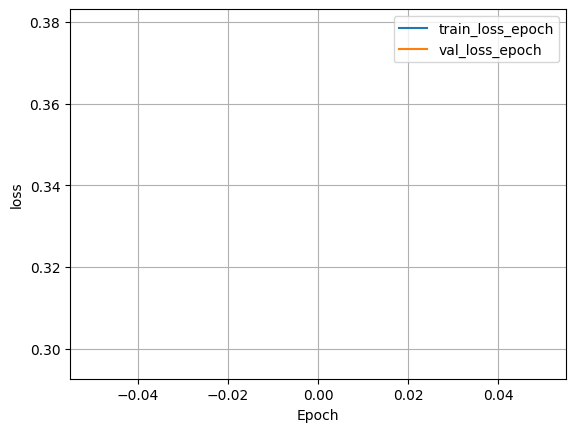

In [117]:
# for i in range(5):
model_mgr = train_model(130, 0.2, 0.000012, 0.0035)

In [ ]:
model_mgr.trainer.checkpoint_callback.best_model_path

'logs/CNN-GNN5\\version_22\\checkpoints\\epoch=1-step=4.ckpt'

In [ ]:
# dropouts = [0.2]
# start_lrs = [0.0035, 0.0037, 0.0039]
# wds = [0.000012]#, 0.000013, 0.0000125]
# for dp in dropouts:
#     for lr in start_lrs:
#         for wd in wds:
#             model_mgr = train_model(100, dp, wd, lr)

In [ ]:
# classifier_torch_model = CNN_for_Text(num_embedding=len(vocab_dict), batch_size=batch_size, hidden_dim=hidden_dim, embedding_dim=embedding_dim, max_char_count=256, dropout=0.176, num_out_features=len(class_id), seed=911, g_node_degree=25, virtual_nodes=1).to(device)
# optimizer = torch.optim.Adam(classifier_torch_model.parameters(), lr=lr, weight_decay=0.00001)
# lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[50, 100, 150, 200, 250, 300, 350],gamma=0.5, verbose=False)
# loss_func = torch.nn.BCEWithLogitsLoss()
# classfier_lightning_model = ClassifierLightningModel(classifier_torch_model, 
#                                                     num_classes=len(class_id),
#                                             learning_rate=lr,
#                                             batch_size=batch_size,
#                                             optimizer=optimizer,
#                                             loss_func=loss_func,
#                                             lr_scheduler=lr_scheduler,
#                                             user_lr_scheduler=True
#                                             ).to(device)

# trainer = L.Trainer(
#             max_epochs=50,
#             accelerator='gpu',
#         #     logger=self.logger,
#             num_sanity_val_steps=0,
#         #     default_root_dir=self.model_save_dir
#         )
# # model_manager = ClassifierModelManager(classifier_torch_model, classfier_lightning_model, log_name='CNN-GNN',device=device, num_train_epoch=5)


In [ ]:
# from lightning.pytorch.tuner import Tuner
# tuner = Tuner(trainer)
# tuning_result = tuner.lr_find(classfier_lightning_model, train_dataloaders=train_dataloader, val_dataloaders=test_dataloader, min_lr=0.00001,max_lr=0.1, num_training=100)

# fig = tuning_result.plot(suggest=True)
# fig.show()

In [ ]:
torch_model = model_mgr.trainer.model.model.eval()

In [ ]:
print(torch_model.gcnn2.conv.weight[torch.topk(torch.amax(torch_model.gcnn2.conv.weight, dim=[1, 2]), 16).indices])


tensor([[[ 3.2035e-01,  2.0037e-01,  3.8293e-01],
         [ 8.6133e-02, -1.2822e-01,  2.1266e-02],
         [-2.9769e-02,  6.2159e-02, -3.1024e-02],
         ...,
         [-4.1246e-02, -8.6743e-02,  5.3916e-03],
         [-4.1412e-02, -8.5278e-02, -3.1010e-02],
         [-2.6527e-02, -9.0403e-02, -4.2477e-02]],

        [[-1.7581e-02, -1.2719e-02, -1.5617e-02],
         [ 6.8038e-02,  5.8736e-02,  7.7225e-02],
         [ 1.4066e-03,  7.8466e-03,  1.5854e-03],
         ...,
         [-1.4663e-02, -1.0500e-02, -1.2658e-02],
         [-1.4879e-02, -1.0949e-02, -1.2791e-02],
         [-1.4351e-02, -1.0970e-02, -1.2901e-02]],

        [[ 3.5320e-02, -6.4809e-03,  3.7910e-02],
         [-1.2305e-02, -1.7124e-02, -1.4228e-02],
         [-2.0755e-02, -2.1756e-02, -1.8589e-02],
         ...,
         [-1.8548e-02, -2.1672e-02, -1.7571e-02],
         [-1.8226e-02, -2.1145e-02, -1.7043e-02],
         [-1.8659e-02, -2.1652e-02, -1.7362e-02]],

        ...,

        [[-2.6705e-22,  8.5410e-18, -2

In [ ]:
torch.topk(torch.mean(torch_model.gcnn2.conv.weight, dim=[1,2]), 5)

torch.return_types.topk(
values=tensor([6.3666e-18, 2.0884e-22, 6.1610e-26, 1.6367e-26, 1.2162e-28],
       device='cuda:0', grad_fn=<TopkBackward0>),
indices=tensor([40, 53, 11, 59, 30], device='cuda:0'))

In [ ]:
torch_model.gcnn1.gnn.lin_l.weight[5]

tensor([-2.7581e-01, -2.6191e-12,  1.4206e-01, -2.6398e-01,  3.0897e-01,
         4.0569e-01,  5.5519e-01, -1.4133e-02,  1.2817e-01, -1.6188e-01,
         2.0320e-01, -6.0456e-03, -1.4974e-01,  1.3882e-01,  4.4378e-02,
         5.6237e-02,  9.4429e-02, -1.0171e-01, -4.8159e-02,  9.5665e-02,
         1.3240e-01,  2.3658e-01, -9.1189e-03, -4.1128e-40, -2.0501e-01,
         1.2683e-01,  1.4156e-01, -1.9746e-01,  1.7320e-01, -2.0111e-01,
         1.5868e-01,  1.0301e-01, -3.9840e-01, -1.0312e-01,  2.0706e-02,
        -4.2674e-02,  7.4345e-02,  4.0973e-40, -9.4116e-02, -1.1387e-03,
         1.5975e-01,  8.5480e-02,  2.0334e-02,  4.0701e-01,  8.9852e-03,
        -2.1146e-01, -1.8167e-01,  4.0931e-02, -1.3469e-02, -2.1577e-01,
        -2.3535e-03, -3.4458e-02, -6.6982e-02,  1.5668e-01, -1.3244e-01,
        -1.3284e-01,  4.2652e-03,  1.0511e-01, -4.5373e-01, -9.9997e-03,
         9.2711e-02,  5.9142e-02,  2.4174e-01, -4.0985e-40], device='cuda:0',
       grad_fn=<SelectBackward0>)

In [ ]:
torch_model.gcnn2.conv.weight[14]

tensor([[-4.9216e-36, -8.9397e-36, -4.7862e-36],
        [-2.6224e-36, -2.5389e-36, -3.8356e-36],
        [-1.0055e-35, -5.9394e-36, -1.1362e-35],
        [-1.0189e-36, -7.4511e-36, -4.1198e-36],
        [-1.1800e-36, -3.0973e-37, -1.4258e-37],
        [ 1.7240e-36,  4.9321e-37,  7.5810e-37],
        [-1.7211e-36, -2.0214e-36, -1.6610e-36],
        [-2.9199e-36, -2.0148e-36, -2.0522e-36],
        [-6.2926e-36, -4.6650e-36, -4.5763e-36],
        [-3.5796e-36, -7.3899e-36, -1.6763e-36],
        [-1.0912e-35, -1.9288e-36, -1.1820e-35],
        [-9.5668e-36, -1.2517e-35, -9.6824e-36],
        [-3.3170e-36, -1.0795e-35, -3.9908e-36],
        [-3.7349e-36, -3.9395e-36, -3.0410e-36],
        [-2.8381e-36, -2.0008e-36, -1.6159e-36],
        [ 1.3706e-37,  6.5016e-36, -5.3387e-37],
        [-5.2655e-36, -6.2696e-36, -3.8563e-36],
        [-4.8169e-36, -5.4868e-36, -6.6131e-36],
        [-2.4377e-36, -6.3636e-36, -3.9446e-36],
        [ 6.1834e-36,  7.6586e-36,  6.2768e-36],
        [-5.4201e-36

In [ ]:
for i in range(64):
    if torch.max(torch_model.gcnn2.conv.weight[i])> 0.0001:
        print(i)

18
55
58
61
62


In [ ]:
torch_model

CNN_for_Text(
  (embedding): Embedding(57, 64)
  (conv1): Conv1d(64, 64, kernel_size=(5,), stride=(1,), padding=(2,))
  (pool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(64, 64, kernel_size=(5,), stride=(1,), padding=(2,))
  (conv3): Conv1d(128, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv4): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (gcnn1): GCNN(
    (gnn): GATv2Conv(64, 8, heads=4)
    (conv): Conv1d(64, 32, kernel_size=(3,), stride=(1,), padding=(1,))
    (fc): Linear(in_features=32, out_features=64, bias=True)
    (bn1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (gcnn2): GCNN(
    (gnn): GATv2Conv(128, 16, heads=4)
    (conv): Conv1d(128, 64, kernel_size=(3,), stride=(1,), padding=(1,))
    (fc): Linear(in_features=64, out_features=128, bias=True)
    (bn1): BatchNo

In [ ]:
# for d in dropouts:
#     for wd in weight_decays:
#         for lr in lrs:
#             train_model(50, d, wd, lr)